### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

1. I primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto):
                country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
61               France                          11.8
45       Czech Republic                          11.8
141  Russian Federation                          11.5
99           Luxembourg                          11.4
155            Slovakia                          11.4
81              Ireland                          11.4

Media del consumo di birra: 106.16062176165804
Media del consumo di vino: 49.45077720207254
Media del consumo di distillati: 80.99481865284974

Dataset con la nuova colonna:
             country  beer_servings  spirit_servings  wine_servings  \
0        Afghanistan              0                0              0   
1          

Text(0, 0.5, 'wine_servings')

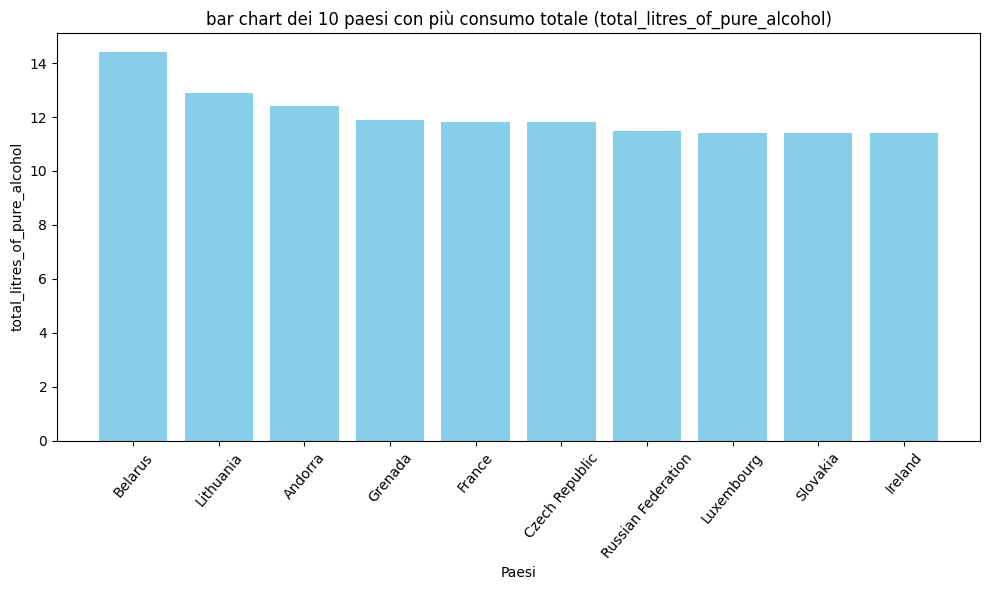

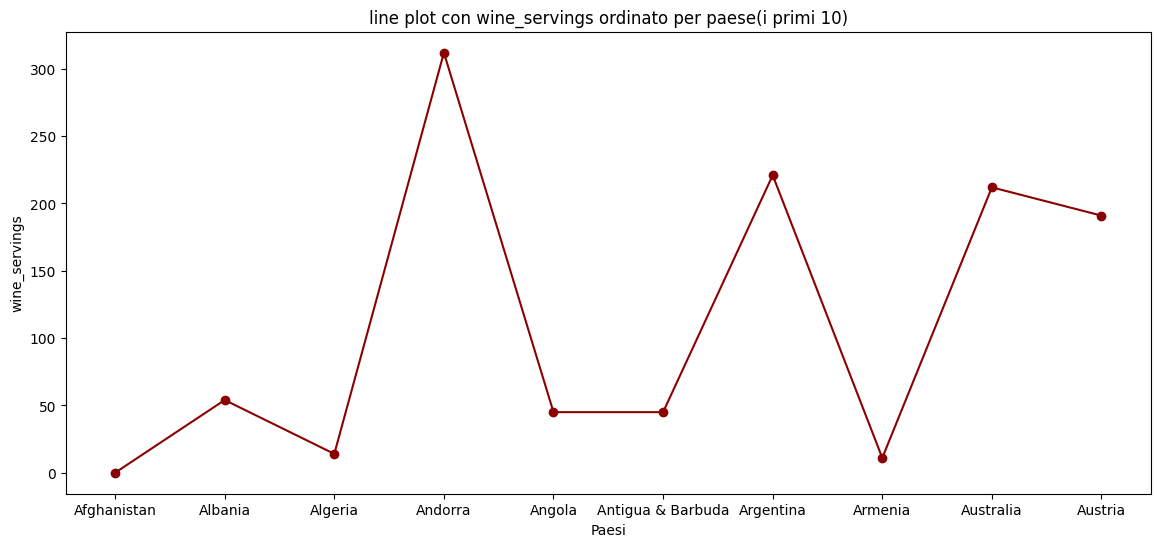

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
print("1. I primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto):")
print(df[["country", "total_litres_of_pure_alcohol"]].sort_values(by= "total_litres_of_pure_alcohol", ascending=False).head(10))
print(f"\nMedia del consumo di birra: {df["beer_servings"].mean()}")
print(f"Media del consumo di vino: {df["wine_servings"].mean()}")
print(f"Media del consumo di distillati: {df["spirit_servings"].mean()}\n")
df["alcohol_index"] = (df["beer_servings"]+df["wine_servings"]+df["spirit_servings"])/3
print("Dataset con la nuova colonna:")
print(df.head(10))
paese = df.loc[df['alcohol_index'].idxmax(), "country"]
print(f"Il paese con il valore massimo di alcohol_index è l'{paese} ")
bir = df.loc[df["beer_servings"]>100, ["country"]]
print("\nI paesi che consumano più di 100 birre all’anno:")
print(bir)
paesi_consum = df.sort_values(by="total_litres_of_pure_alcohol", ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.bar(paesi_consum["country"], paesi_consum["total_litres_of_pure_alcohol"], color="skyblue")
plt.title("bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)")
plt.xlabel("Paesi")
plt.ylabel("total_litres_of_pure_alcohol")
plt.xticks(rotation = 50)
plt.tight_layout()

var = df.sort_values(by="country")
plt.figure(figsize=(14, 6))
plt.plot(var["country"].head(10), var["wine_servings"].head(10), marker="o", color="darkred")
plt.title("line plot con wine_servings ordinato per paese(i primi 10)")
plt.xlabel("Paesi")
plt.ylabel("wine_servings")


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [4]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


c:\Users\kasse\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
stipendio_med = df.groupby("job_country")["salary_year_avg"].mean().dropna()
# print("Stipendio medio per paese:")
# print(stipendio_med)
offerte = df.groupby("job_country")["job_title"].count().dropna()
# print(f"\nNumero di offerte di lavoro per paese : totale = {offerte.sum()}")
# print(offerte)
off_max = df.groupby("job_country")["salary_year_avg"].max().dropna()
off_min = df.groupby("job_country")["salary_year_avg"].min().dropna()
# print("\nsalari minimi per paese:")
# print(off_min)
# print("\nslari massimi per paese")
# print(off_max)

# stip_ordinato = df.sort_values(by="salary_year_avg", ascending=False)

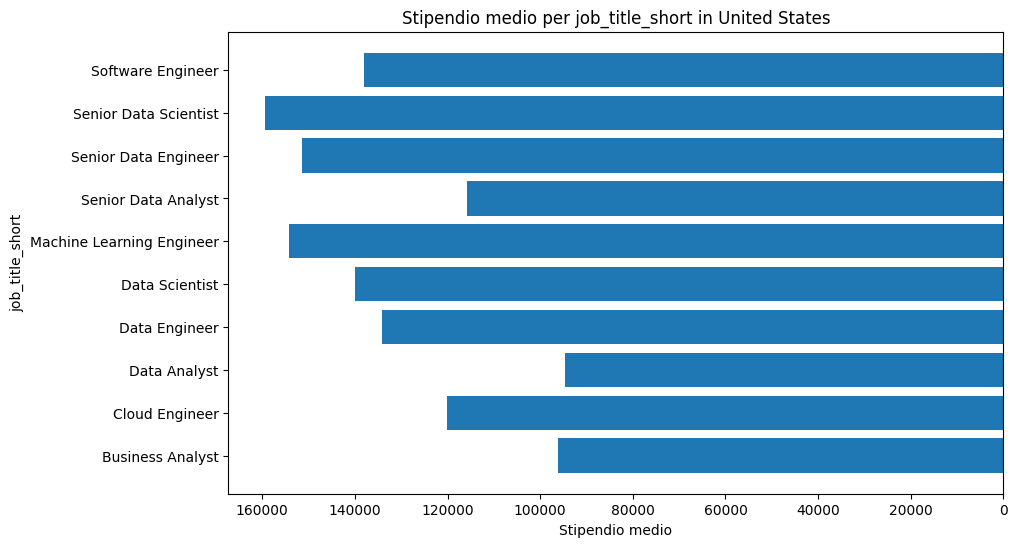

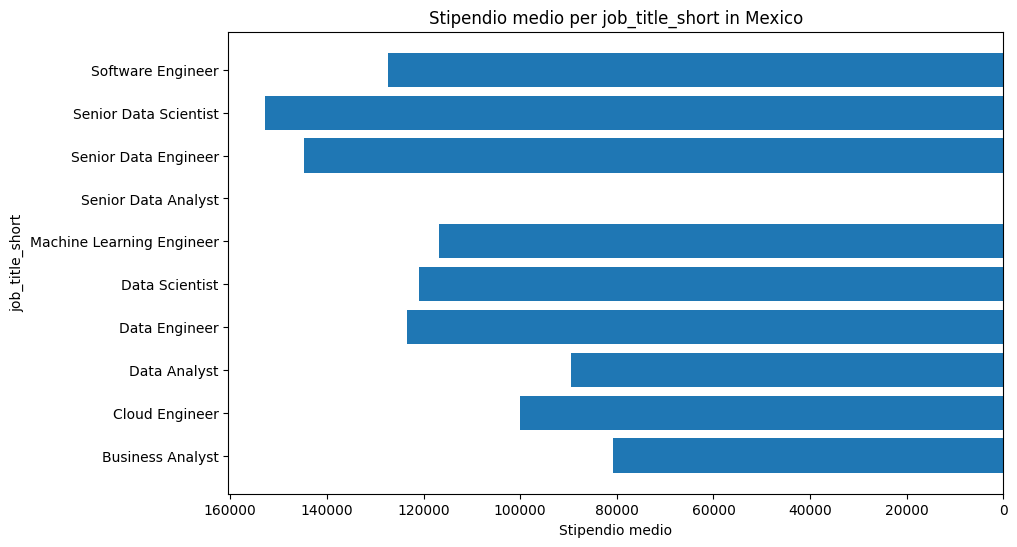

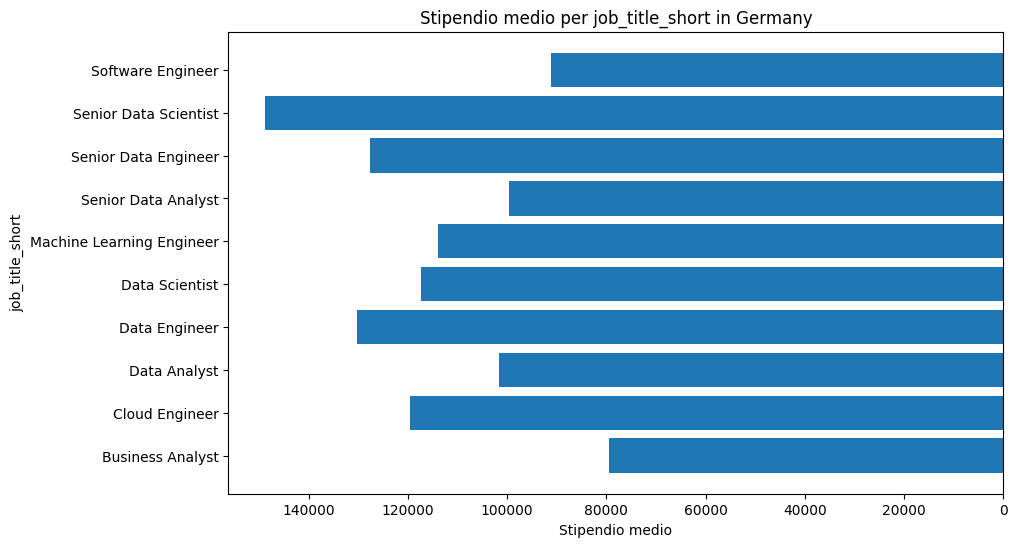

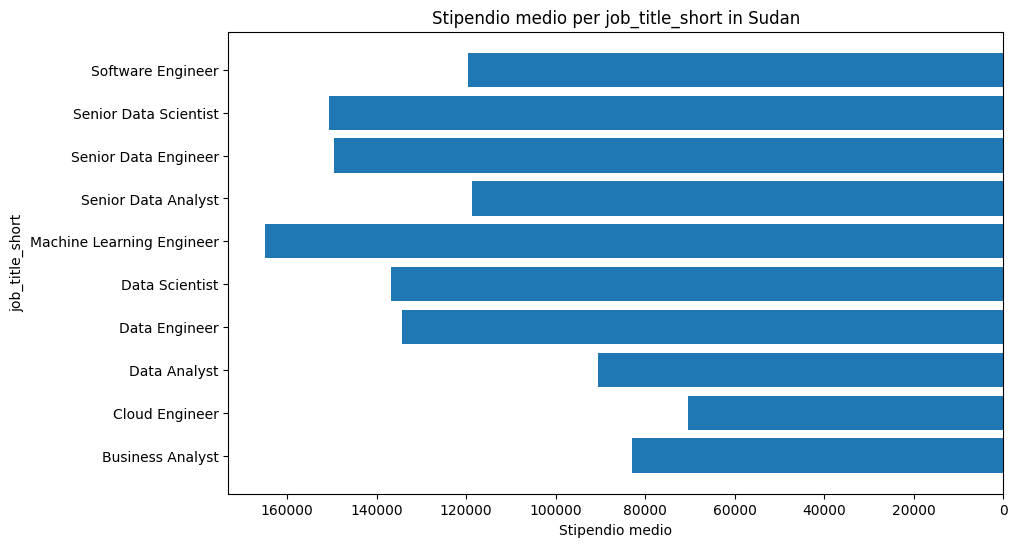

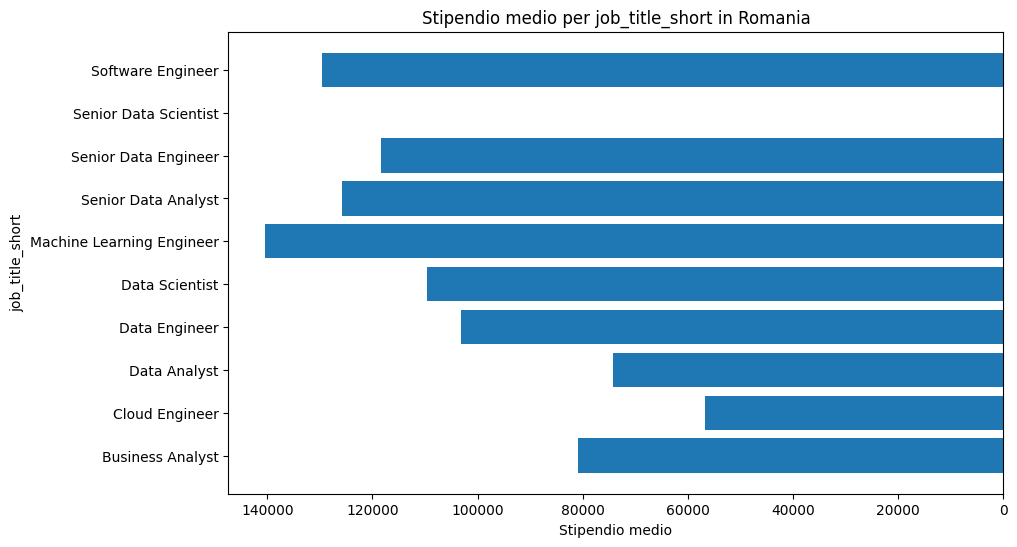

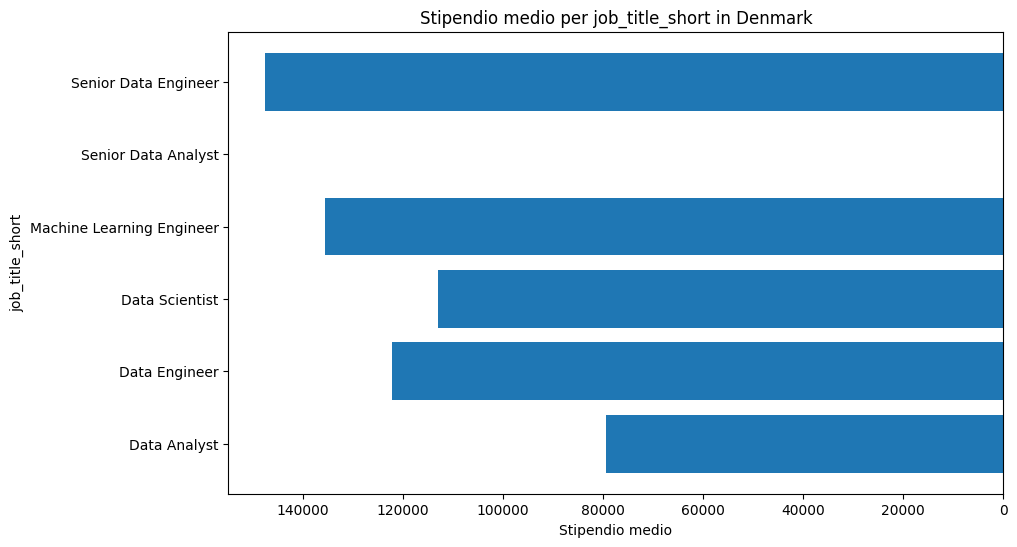

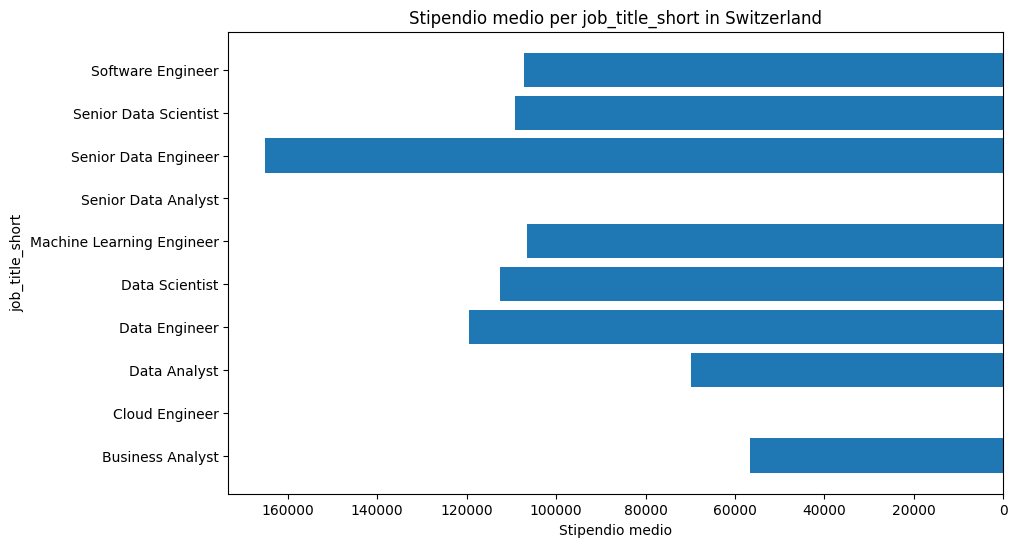

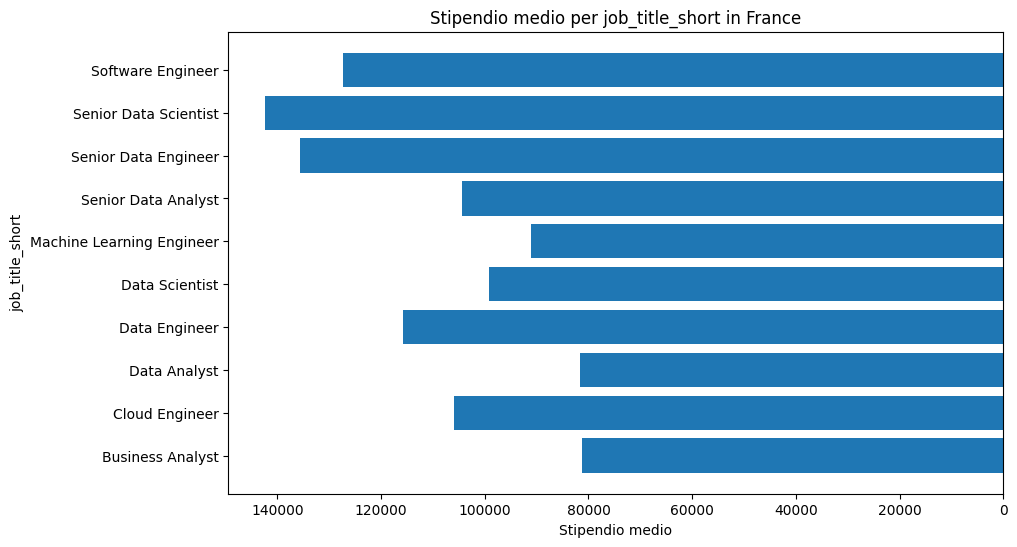

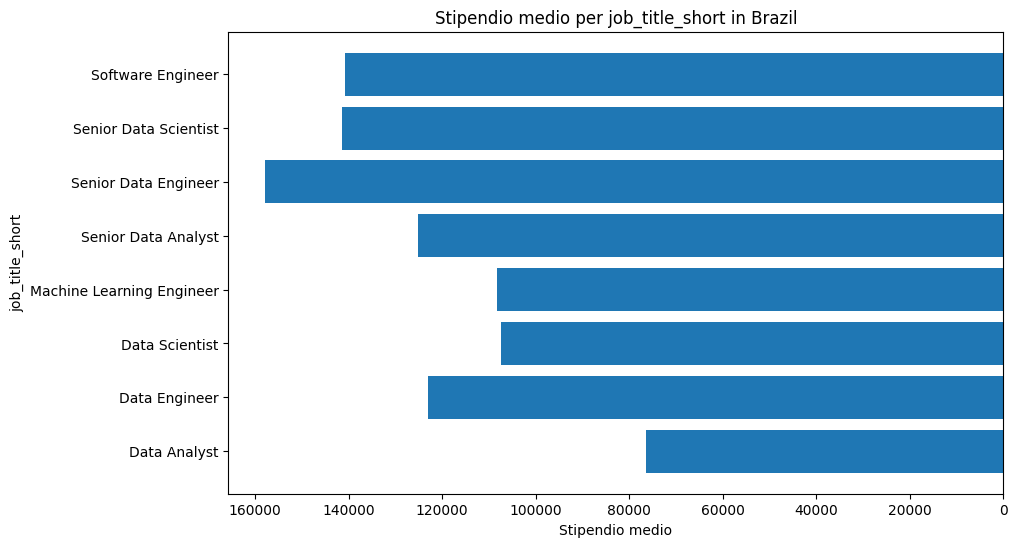

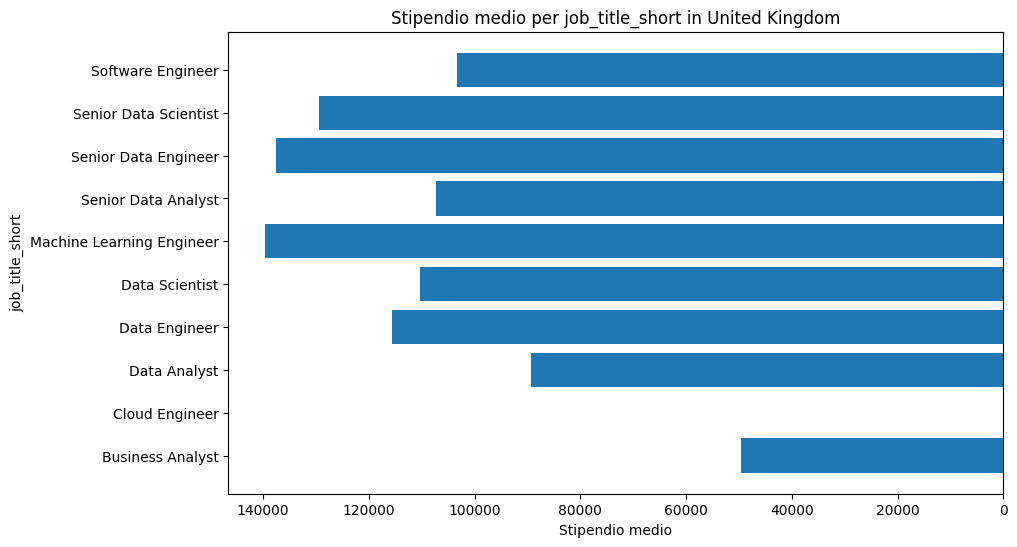

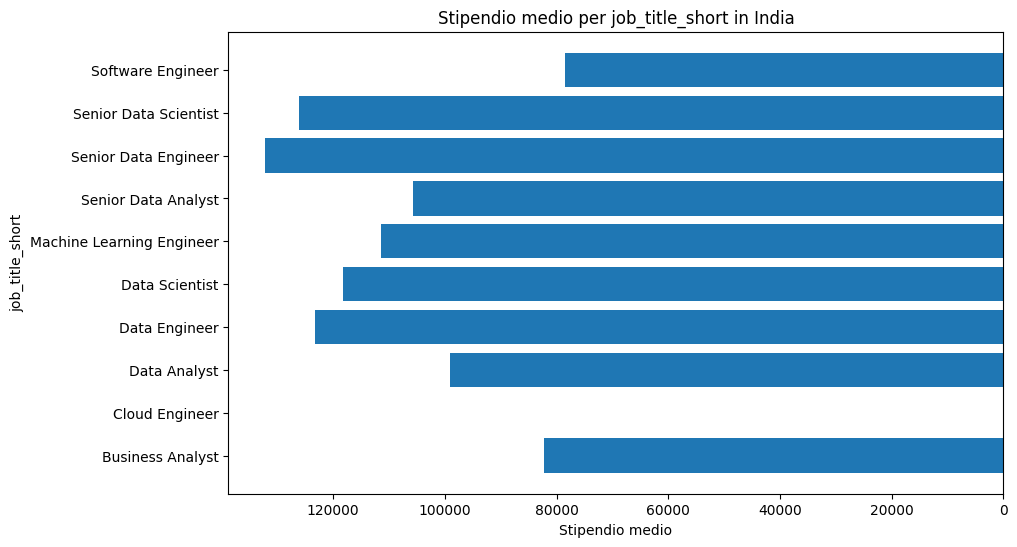

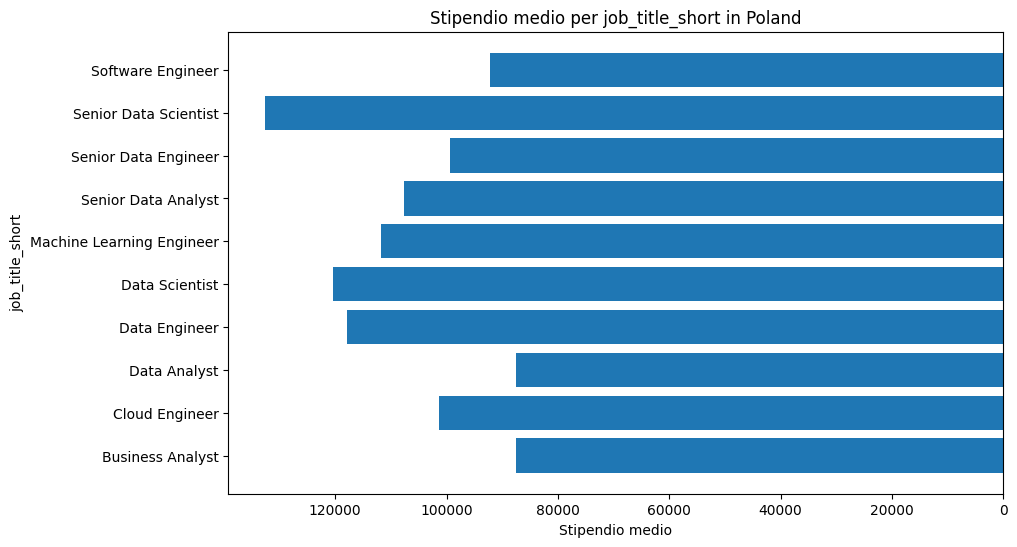

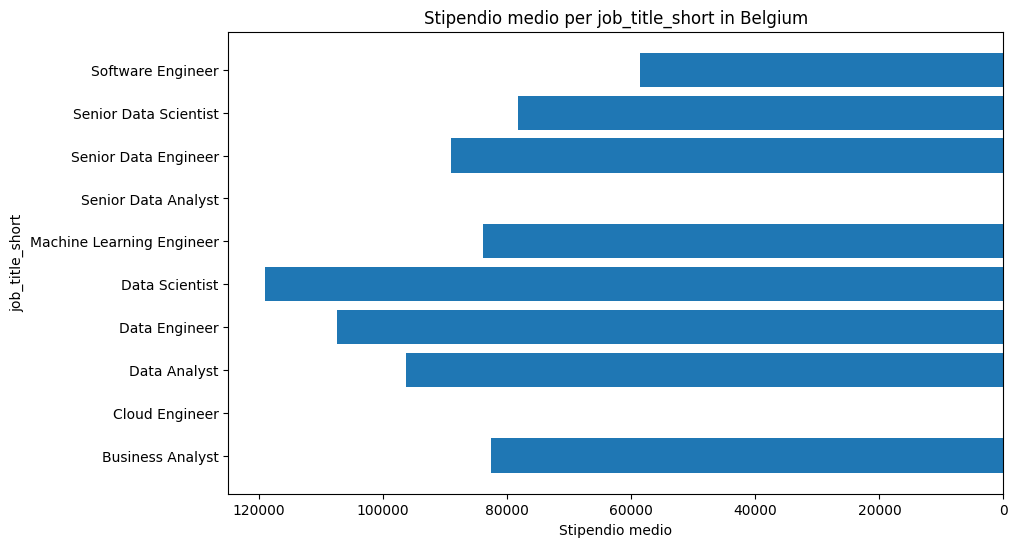

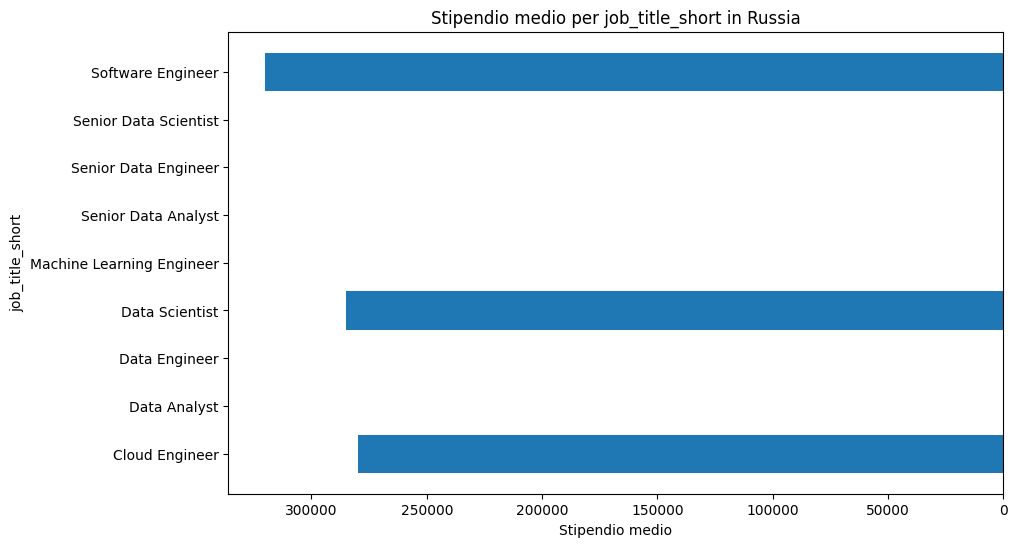

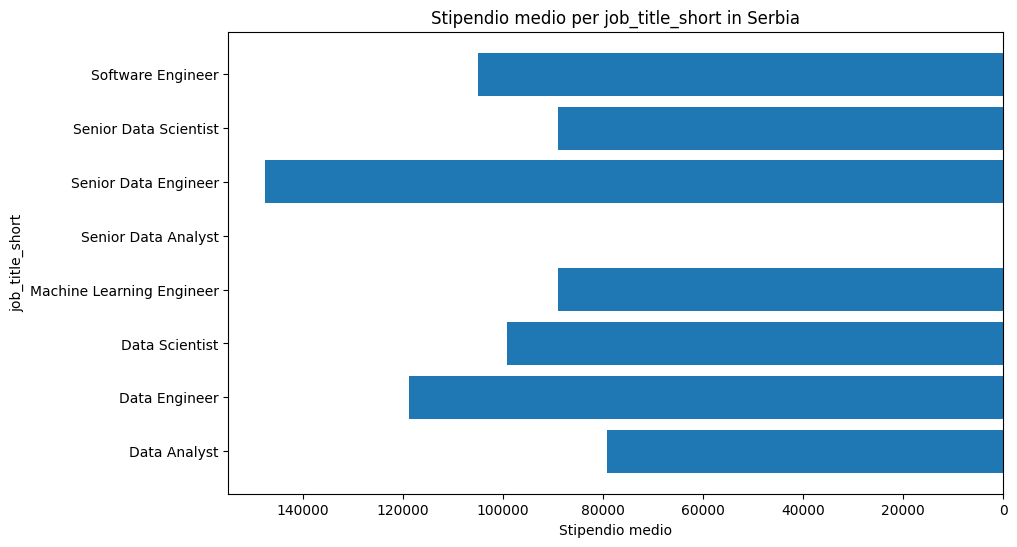

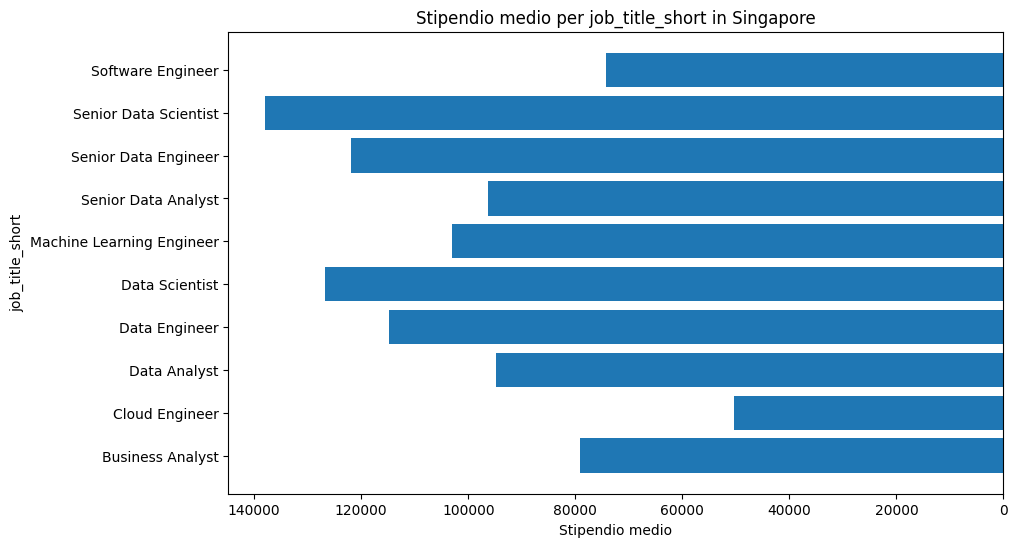

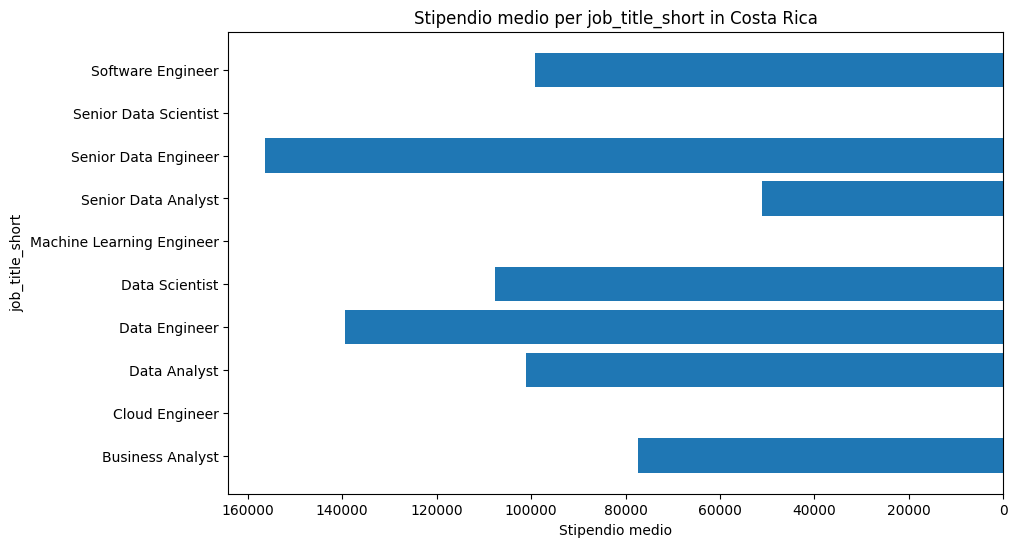

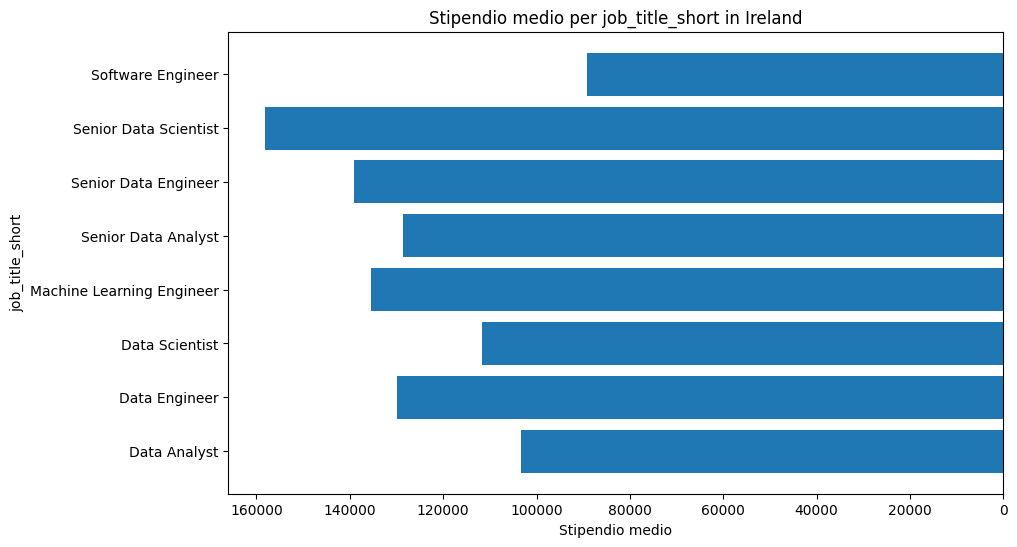

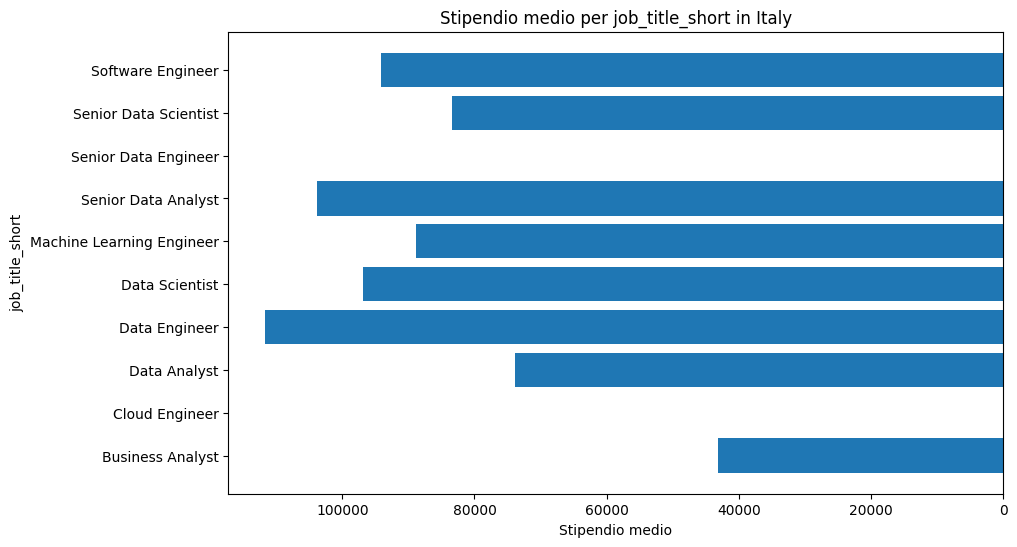

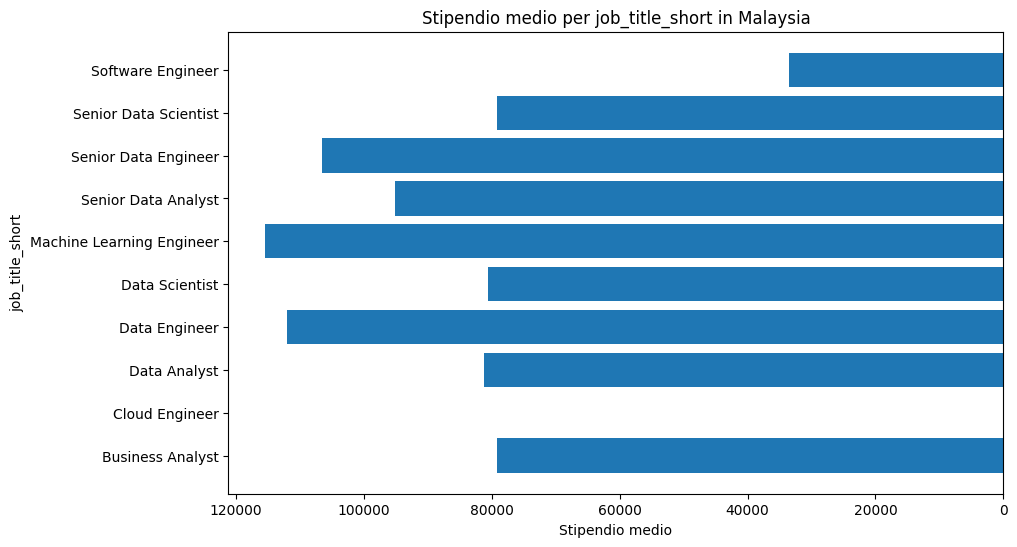

In [50]:
import matplotlib.pyplot as plt

for paese in df["job_country"].unique()[:20]:
    stipendio = df[df["job_country"] == paese]
    stip_med = stipendio.groupby("job_title_short")["salary_year_avg"].mean()
    plt.figure(figsize=(10, 6))
    # stip_med.plot(kind="barh")
    plt.barh(stip_med.index, stip_med.values)
    plt.title(f"Stipendio medio per job_title_short in {paese}")
    plt.xlabel("Stipendio medio")
    plt.ylabel("job_title_short")
    plt.gca().invert_xaxis()
    plt.show()


